The main dataset will come from here: https://open.canada.ca/data/en/dataset/d5614095-e77a-4cb4-a5e6-9f8bff067c9f

It has already been downloaded to this repo and is called `32100077.csv`.


In [1]:
import datetime as dt

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

prices_df = pd.read_csv("./data/32100077.csv")
metadata_df = pd.read_csv("./data/32100077_MetaData.csv")

In [2]:
# The main dataset displays a time series of prices for different Canadian agricultural products over time.
print(prices_df.shape)
prices_df

(109951, 15)


,REF_DATE,GEO,DGUID,Farm products,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1980-01,Manitoba,2016A000246,"Canadian Wheat Board, wheat including payments",Dollars per metric tonne,117,units,0,v31212166,7.40,170.49,NaN,NaN,t,2
1,1980-01,Manitoba,2016A000246,"Canadian Wheat Board, wheat excluding payments",Dollars per metric tonne,117,units,0,v31212167,7.50,133.74,NaN,NaN,t,2
2,1980-01,Manitoba,2016A000246,"Canadian Wheat Board, durum including payments",Dollars per metric tonne,117,units,0,v31212168,7.60,178.79,NaN,NaN,t,2
3,1980-01,Manitoba,2016A000246,"Canadian Wheat Board, durum excluding payments",Dollars per metric tonne,117,units,0,v31212169,7.70,142.90,NaN,NaN,t,2
4,1980-01,Saskatchewan,2016A000247,"Canadian Wheat Board, wheat including payments",Dollars per metric tonne,117,units,0,v31212202,8.40,175.79,NaN,NaN,t,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109946,2023-09,British Columbia,2016A000259,Hogs [111121],Dollars per hundredweight,108,units,0,v31212297,10.37,112.90,NaN,NaN,NaN,2
109947,2023-09,British Columbia,2016A000259,Chickens for meat [11113131],Dollars per kilogram,113,units,0,v31212298,10.38,3.00,NaN,NaN,NaN,2
109948,2023-09,British Columbia,2016A000259,Turkeys for meat [111132211],Dollars per kilogram,113,units,0,v31212299,10.39,3.32,NaN,NaN,NaN,2
109949,2023-09,British Columbia,2016A000259,Unprocessed milk from bovine [11612111],Dollars per kilolitre,114,units,0,v31212300,10.40,963.89,NaN,NaN,NaN,2


In [3]:
# Let's convert the ref_date column into a datetime data type
prices_df["REF_DATE"] = pd.to_datetime(prices_df["REF_DATE"].apply(lambda x: dt.datetime.strptime(x, "%Y-%m")))

# what is the list of unique farm products?
prices_df["Farm products"].sort_values().unique()

array(['Barley [1151141]', 'Barley for animal feed [115114111]',
       'Barley for malt and other human consumption [11511412]',
       'Calves for feeding [11111122]',
       'Calves for slaughter [111111211]',
       'Canadian Wheat Board, barley excluding payments',
       'Canadian Wheat Board, barley including payments',
       'Canadian Wheat Board, durum excluding payments',
       'Canadian Wheat Board, durum including payments',
       'Canadian Wheat Board, selected barley excluding payments',
       'Canadian Wheat Board, selected barley including payments',
       'Canadian Wheat Board, wheat excluding payments',
       'Canadian Wheat Board, wheat including payments',
       'Canary seeds [11511555]', 'Canola (including rapeseed) [113111]',
       'Cattle for feeding [11111112]', 'Cattle for slaughter [11111111]',
       'Chickens for meat [11113131]', 'Corn for grain [1151111]',
       'Cows for slaughter [111111111]', 'Dry peas [114314]',
       'Durum wheat [112111211]

In [7]:
# create a functon for plotting a time series

def _plot_time_series(var):
    mask = prices_df["Farm products"] == var
    sub_prices_df = prices_df.where(mask).dropna(subset=["Farm products"])
    sns.lineplot(data=sub_prices_df, x="REF_DATE", y="VALUE", hue="GEO"
                 )
    plt.title(f"Time Series of Prices for {var.split(' [')[0]}")
    plt.xlabel("Date")
    plt.ylabel(sub_prices_df["UOM"].iloc[0])
    

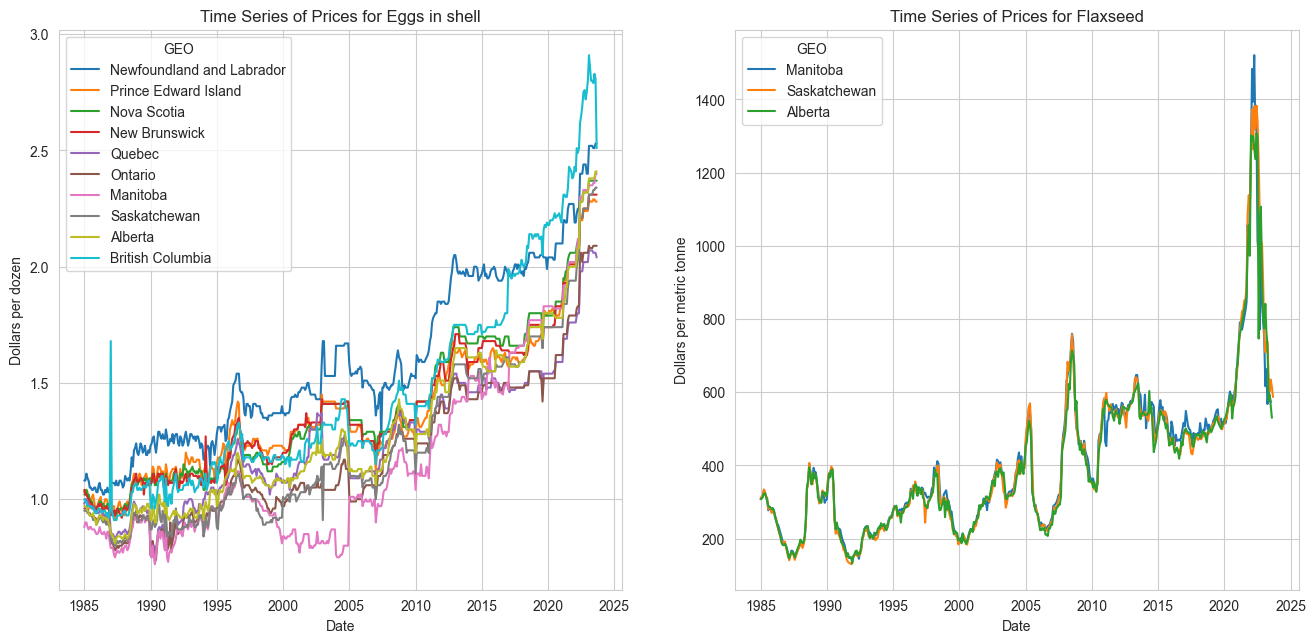

In [11]:
plt.figure(figsize=(16,16))

# let's focus in on eggs in shell production in Canada
plt.subplot(2,2,1)
_plot_time_series("Eggs in shell [116111]")
plt.subplot(2,2,2)
_plot_time_series("Flaxseed [115122111]")


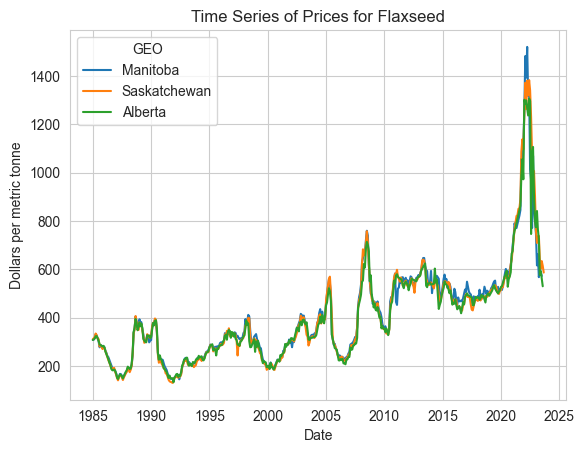

Text(0.5, 1.0, 'Time Series of Prices for Flaxseed in Canada')

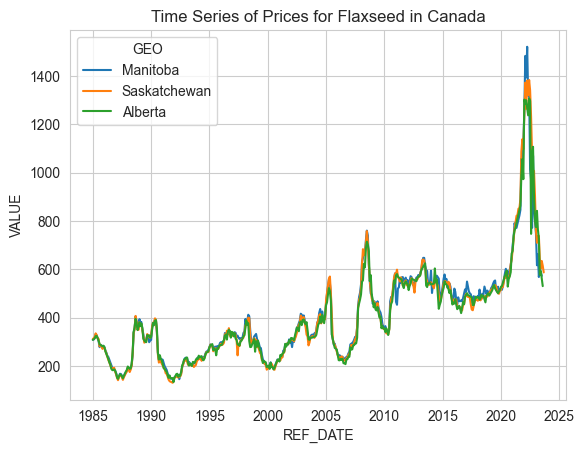

In [5]:
# let's focus in on eggs in shell production in Canada



In [6]:
# we should look at autocorrelation



### Possible questions:
- Which products have shown the greatest change in price
- How does production of a given product correlate with price? For example, if we looked at egg production in response to prices https://open.canada.ca/data/en/dataset/59a62325-9857-491e-8291-fe164c342e48/resource/e44d58af-e1fa-4719-966b-a69edcd4672d 


Loganberries, cranberries and blueberries, production and value
https://open.canada.ca/data/en/dataset/896db994-8209-4a94-b4d0-37d07e1d2698


Another idea was to explore the impact of Canadian crop prices on crop production. We would tackle this question by exploring datasets released by StatsCan / Agricultural Census. 

This dataset provides a time series of agricultural product prices within Canada. We would try to establish a relationship between the price of a crop and its production over time. As an example, if we decide to explore this relationship with table egg production, here is a dataset looking at egg yields over time.

We can also explore rates of change in pricing for the different product types over time. 

